#Volume de tráfego médio mensal que passam nos equipamentos de Fiscalização Eletrônica de Fortaleza.




###Dicionário de variáveis


*   SITIO:
*   LONG: Longitude.
*   LAT: Latitude.
*   VIA_SENTIDO: Sentido da via.
*   DATA: Data em que os dados foram registrados. (2017 - 2022)
*   VMD: O *Volume Médio Diário* (VMD) é o volume ou tráfego registrado em um dia (24 horas). Esse dado é utilizado para avaliar a distribuição de tráfego, medir a demanda de uma via e programar melhorias básicas.




In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import preprocessing

In [4]:
#Dataset
df = pd.read_csv("/volumetrafegomensal-1.csv")
df = df.drop(columns=["Unnamed: 0"])
df

,SITIO,LONG,LAT,VIA_SENTIDO,DATA,VMD
0,01385016,-38.572696,-3.712192,AV. FRANCISCO SA [O-L],2017-01,8765
1,01385017,-38.572683,-3.712145,AV. FRANCISCO SA [L-O],2017-01,9357
2,01385028,-38.615730,-3.818608,AV. GEN. OSORIO DE PAIVA [N-S],2017-01,16558
3,01385029,-38.615600,-3.818744,AV. GEN. OSORIO DE PAIVA [S-N],2017-01,15843
4,01385030,-38.574740,-3.811549,AV. GODOFREDO MACIEL [N-S],2017-01,19433
...,...,...,...,...,...,...
20505,FS142,-38.532926,-3.795249,AV. DR. SILAS MUNGUBA [O-L],2022-12,10177
20506,FS144,-38.560709,-3.819893,AV. PRES. COSTA E SILVA [L-O],2022-12,10322
20507,FS145,-38.562657,-3.819108,AV. PRES. COSTA E SILVA [O-L],2022-12,11773
20508,FS146,-38.573170,-3.806822,AV. GODOFREDO MACIEL [N-S],2022-12,11045


In [5]:
#Separa a data em duas colunas, ano e mês
df["DATA"] = pd.to_datetime(df["DATA"])
df['ANO'] = df['DATA'].dt.year
df['MES'] = df['DATA'].dt.month
df = df.drop(columns=["DATA"] )
df

,SITIO,LONG,LAT,VIA_SENTIDO,VMD,ANO,MES
0,01385016,-38.572696,-3.712192,AV. FRANCISCO SA [O-L],8765,2017,1
1,01385017,-38.572683,-3.712145,AV. FRANCISCO SA [L-O],9357,2017,1
2,01385028,-38.615730,-3.818608,AV. GEN. OSORIO DE PAIVA [N-S],16558,2017,1
3,01385029,-38.615600,-3.818744,AV. GEN. OSORIO DE PAIVA [S-N],15843,2017,1
4,01385030,-38.574740,-3.811549,AV. GODOFREDO MACIEL [N-S],19433,2017,1
...,...,...,...,...,...,...,...
20505,FS142,-38.532926,-3.795249,AV. DR. SILAS MUNGUBA [O-L],10177,2022,12
20506,FS144,-38.560709,-3.819893,AV. PRES. COSTA E SILVA [L-O],10322,2022,12
20507,FS145,-38.562657,-3.819108,AV. PRES. COSTA E SILVA [O-L],11773,2022,12
20508,FS146,-38.573170,-3.806822,AV. GODOFREDO MACIEL [N-S],11045,2022,12


In [6]:
df.shape

(20510, 7)

In [7]:
df.dtypes

SITIO           object
LONG           float64
LAT            float64
VIA_SENTIDO     object
VMD              int64
ANO              int64
MES              int64
dtype: object

In [9]:
df.isnull().sum()
#nenhum dado nulo

SITIO          0
LONG           0
LAT            0
VIA_SENTIDO    0
VMD            0
ANO            0
MES            0
dtype: int64

In [10]:
df.sample(5)

,SITIO,LONG,LAT,VIA_SENTIDO,VMD,ANO,MES
12344,01385405,-38.523637,-3.749864,AV. AGUANAMBI [S-N],198,2020,4
12680,AT087,-38.560894,-3.757260,AV. AMERICO BARREIRA [L-O],12136,2020,5
9728,01385288,-38.513511,-3.742046,AV. ANTONIO SALES [O-L],2302,2019,8
17795,01385283,-38.518690,-3.740422,AV. ANTONIO SALES [O-L],1558,2021,12
18835,01385264,-38.488919,-3.735922,AV. DOM LUIS [L-O],4795,2022,5


<ipython-input-11-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


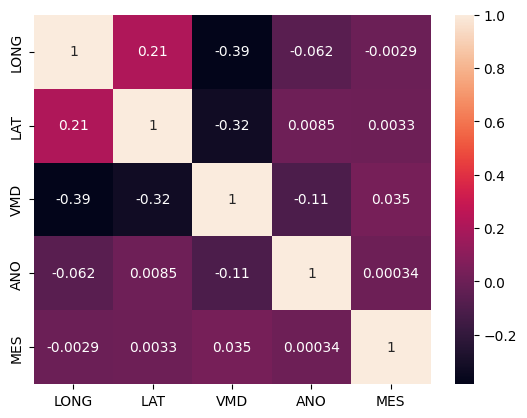

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
df

,SITIO,LONG,LAT,VIA_SENTIDO,VMD,ANO,MES
0,01385016,-38.572696,-3.712192,AV. FRANCISCO SA [O-L],8765,2017,1
1,01385017,-38.572683,-3.712145,AV. FRANCISCO SA [L-O],9357,2017,1
2,01385028,-38.615730,-3.818608,AV. GEN. OSORIO DE PAIVA [N-S],16558,2017,1
3,01385029,-38.615600,-3.818744,AV. GEN. OSORIO DE PAIVA [S-N],15843,2017,1
4,01385030,-38.574740,-3.811549,AV. GODOFREDO MACIEL [N-S],19433,2017,1
...,...,...,...,...,...,...,...
20505,FS142,-38.532926,-3.795249,AV. DR. SILAS MUNGUBA [O-L],10177,2022,12
20506,FS144,-38.560709,-3.819893,AV. PRES. COSTA E SILVA [L-O],10322,2022,12
20507,FS145,-38.562657,-3.819108,AV. PRES. COSTA E SILVA [O-L],11773,2022,12
20508,FS146,-38.573170,-3.806822,AV. GODOFREDO MACIEL [N-S],11045,2022,12


##Modelando

In [13]:
X = df.drop(columns=["SITIO","VIA_SENTIDO","VMD"] )
y = df["VMD"]
X

,LONG,LAT,ANO,MES
0,-38.572696,-3.712192,2017,1
1,-38.572683,-3.712145,2017,1
2,-38.615730,-3.818608,2017,1
3,-38.615600,-3.818744,2017,1
4,-38.574740,-3.811549,2017,1
...,...,...,...,...
20505,-38.532926,-3.795249,2022,12
20506,-38.560709,-3.819893,2022,12
20507,-38.562657,-3.819108,2022,12
20508,-38.573170,-3.806822,2022,12


In [14]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42 )

In [15]:
X_train.shape, X_test.shape

((14357, 4), (6153, 4))

In [16]:
y_train.shape, y_test.shape

((14357,), (6153,))

In [17]:
X_train

,LONG,LAT,ANO,MES
18011,-38.518690,-3.740422,2022,1
5267,-38.493031,-3.738022,2018,6
14460,-38.555480,-3.755081,2020,11
15232,-38.517680,-3.740739,2021,1
1246,-38.508263,-3.806640,2017,4
...,...,...,...,...
11284,-38.532240,-3.719128,2020,1
11964,-38.496091,-3.747451,2020,3
5390,-38.585192,-3.741946,2018,6
860,-38.509774,-3.721552,2017,3


In [18]:
y_train

18011     1361
5267      1950
14460     8835
15232     1491
1246     22798
         ...  
11284    28115
11964     1502
5390     14376
860       9555
15795      804
Name: VMD, Length: 14357, dtype: int64

In [19]:
def RegressionModel(model,X_test, y_test):
  pred = model.predict(X_test)
  print("R2 Score: ", r2_score(y_test, pred))
  print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test,pred))

##Classificando


In [20]:
#DecisionTree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
dt_pred = dt.predict(X_test)

In [22]:
RegressionModel(dt,X_test, y_test)


R2 Score:  0.9331890811577446
Mean Absolute Error (MAE):  1064.3356086461888


In [23]:
fig = px.scatter(x=y_test, y=dt_pred, title="Real x Previsto", trendline="ols", labels={"x":"Real","y":"Previsto"})
fig.show()

In [24]:
#RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
rfpred = rf.predict(X_test)

In [26]:
RegressionModel(rf,X_test,y_test)

R2 Score:  0.9523127591164608
Mean Absolute Error (MAE):  927.9636990086137
